# Census Income Project


Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



Importing the Data Set

In [5]:
import pandas as pd
df=pd.read_csv("census_income.csv")

In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Importing the required libraries

In [7]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Basic Outlook of the Dataset

In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [12]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Observation:
    
    1.Dataset consists of 15columns.

In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observations:

1.No null values present.

Exploratory Data Analysis

Column 1: Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

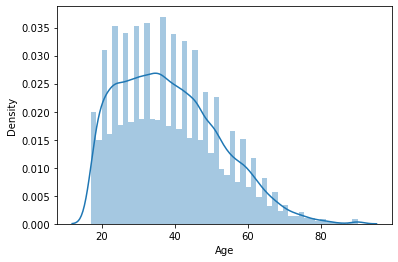

In [18]:
sns.distplot(df['Age'],kde=True)

<AxesSubplot:>

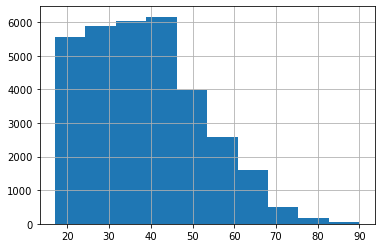

In [19]:
df['Age'].hist(grid=True)

In [20]:
df['Age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

Observations:
    
    1. Most of the people are in between 17 and 60 years of Age.

Column 2: Workclass

In [21]:
#creating the dictionary to know which label represents what

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Workclass'])
label_Workclass=dict(zip(range(len(le.classes_)),le.classes_)) 

In [22]:
df['Workclass']=le.fit_transform(df['Workclass'])

In [23]:
df.replace(0,4,inplace=True)

In [24]:
df['Workclass'].value_counts()

4    24532
6     2541
2     2093
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

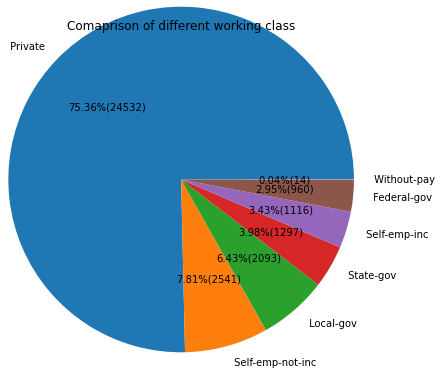

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=[label_Workclass[4],label_Workclass[6],label_Workclass[2],label_Workclass[7],label_Workclass[5],label_Workclass[1],label_Workclass[8]]
value=[24532,2541,2093,1297,1116,960,14]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different working class')
plt.show()

<AxesSubplot:xlabel='Workclass', ylabel='count'>

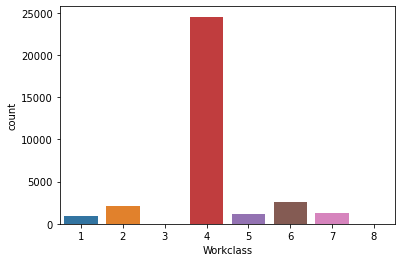

In [26]:
sns.countplot(df['Workclass'])

Observations:

1.Majority of people that is, 76.36% of the population work in private sector followed by self employed 7.81%, Local-govt 6.43%, State-govt 3.98% and so on.

Column 3: Fnlwgt

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

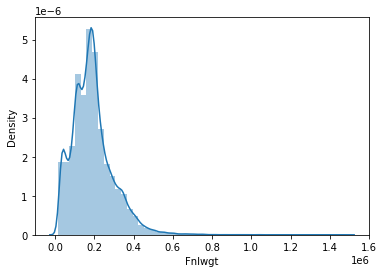

In [27]:
sns.distplot(df['Fnlwgt'])

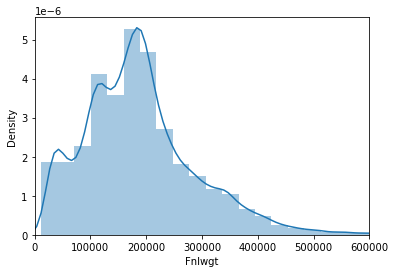

In [28]:
plt.plot()
sns.distplot(df['Fnlwgt'])
plt.xlim(0,600000)
plt.show()

In [29]:
df['Fnlwgt'].value_counts()

164190     13
203488     13
123011     13
148995     12
126675     12
113364     12
121124     12
123983     11
188246     11
111483     11
102308     11
120277     11
120131     11
241998     11
190290     11
126569     11
155659     11
99185      10
125461     10
125933     10
155489     10
174789     10
112497     10
117963     10
194630     10
193882     10
125892     10
186934     10
216129     10
119793     10
177675     10
202872      9
129573      9
200471      9
124963      9
214542      9
221172      9
82393       9
112847      9
218490      9
194901      9
111567      9
118551      9
116632      9
175262      9
154374      8
151089      8
185041      8
157747      8
138768      8
161141      8
147258      8
132601      8
210736      8
163665      8
144949      8
111128      8
108435      8
213140      8
104501      8
210781      8
176185      8
176683      8
172538      8
169104      8
130620      8
108140      8
132879      8
184655      8
160120      8
144778      8
181091

Observations:

1.The graph is distorted and we can see a significant density upto an range of 6 lakh.

Column 4: Education

In [30]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [31]:
le.fit(df['Education'])
label_Education=dict(zip(range(len(le.classes_)),le.classes_)) 

In [32]:
df['Education']=le.fit_transform(df['Education'])

In [33]:
labels=[]
for i in range(0,16):
    labels.append(label_Education[i])
print(labels)

[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']


In [34]:
df['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

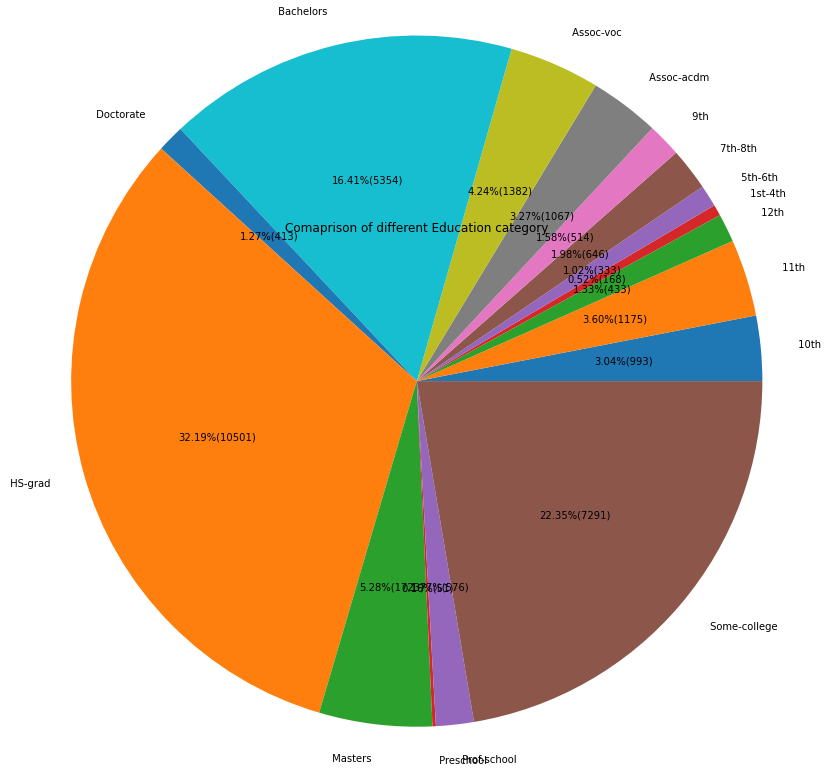

In [35]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels
value=[993,1175,433,168,333,646,514,1067,1382,5354,413,10501,1723,51,576,7291]
ax.pie(value,labels=langs,radius=3,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different Education category')
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

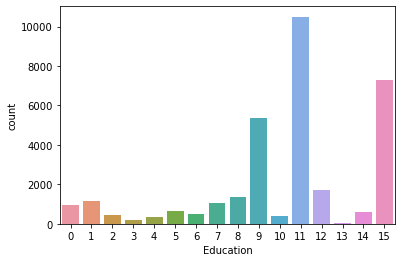

In [36]:
sns.countplot(df['Education'])

In [37]:
label_Education[11]

' HS-grad'

In [38]:
label_Education[15]

' Some-college'

In [39]:
label_Education[9]

' Bachelors'

Observations:

1.Majority of the population belongs to HS-grad,followed by some-college and bacheolors.

Column 5:Education_num

In [40]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<AxesSubplot:xlabel='Education_num', ylabel='count'>

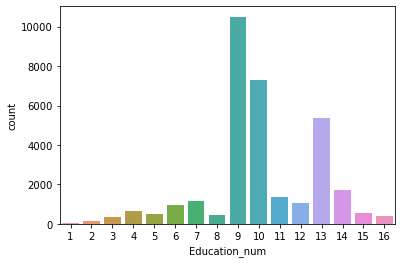

In [41]:
sns.countplot(df['Education_num'])

Observations:

1.Education_num 9,10 and 13 are in are high.

Column 6: Marital_status

In [42]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [43]:
le.fit(df['Marital_status'])
label_Marital_status=dict(zip(range(len(le.classes_)),le.classes_)) 

In [44]:
df['Marital_status']=le.fit_transform(df['Marital_status'])

In [45]:
labels1=[]
for i in range(0,7):
    labels1.append(label_Marital_status[i])
print(labels1)

[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']


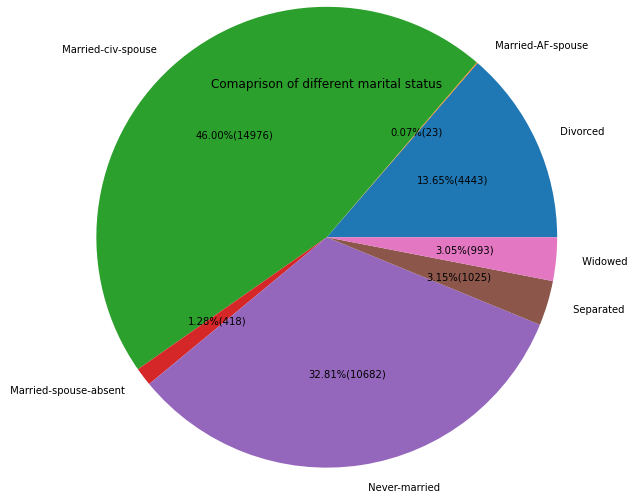

In [46]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels1
value=[4443,23,14976,418,10682,1025,993]
ax.pie(value,labels=langs,radius=2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different marital status')
plt.show()

Observations:
    
    1. Majority are Married-civ-spouse 46%, followed by Never-married 32.81%, divorced 13.65% and so on.

Column 7: Occupation

In [47]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [48]:
df['Occupation'].replace('?','Prof-specialty',inplace=True)

In [49]:
le.fit(df['Occupation'])
label_Occupation=dict(zip(range(len(le.classes_)),le.classes_))

In [50]:
label_Occupation[0]

' ?'

In [51]:
df['Occupation']=le.fit_transform(df['Occupation'])

In [52]:
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [53]:
labels2=[]
for i in range(0,15):
    labels2.append(label_Occupation[i])
print(labels2)

[' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']


In [54]:
df['Occupation'].replace(0,10,inplace=True)

In [55]:
df['Occupation'].value_counts()

10    5983
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [56]:
labels3=[]
for i in range(1,15):
    labels3.append(labels2[i])
print(labels3)

[' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']


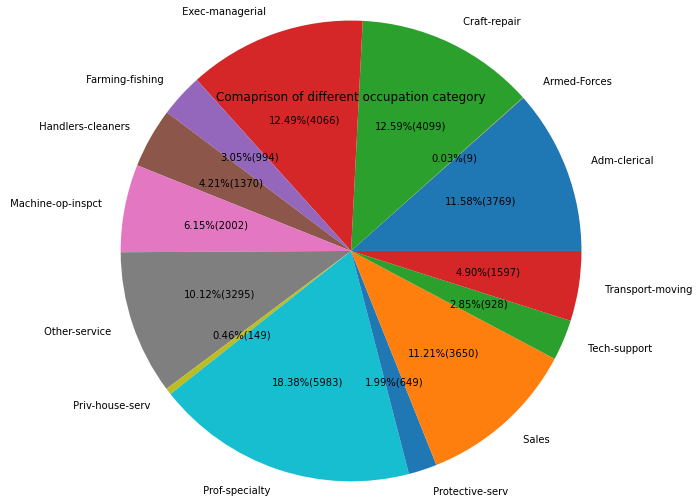

In [57]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels3
value=[3769,9,4099,4066,994,1370,2002,3295,149,5983,649,3650,928,1597]
ax.pie(value,labels=langs,radius=2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different occupation category')
plt.show()

Observations:

1.18.38% of the population belongs to prof-speciality then followed by exec-managerial,craft repair.

Column 8: Relationship

In [58]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [59]:
le.fit(df['Relationship'])
label_Relationship=dict(zip(range(len(le.classes_)),le.classes_))

In [60]:
label_Relationship[0]

' Husband'

In [61]:
df['Relationship']=le.fit_transform(df['Relationship'])

In [62]:
labels4=[]
for i in range(0,6):
    labels4.append(label_Relationship[i])
print(labels4)

[' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife']


In [63]:
df['Relationship'].value_counts()

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

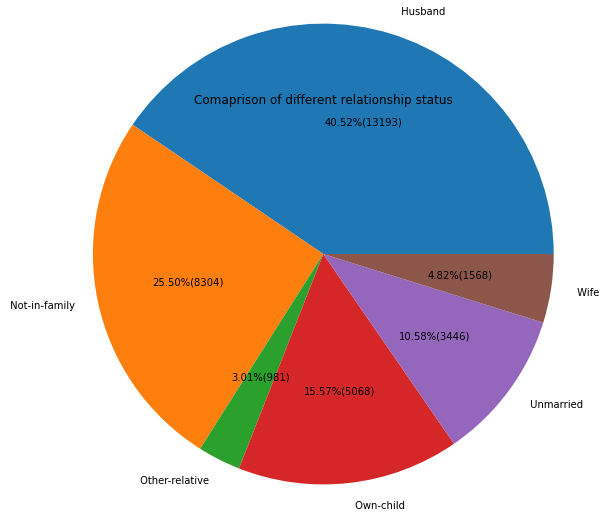

In [64]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels4
value=[13193,8304,981,5068,3446,1568]
ax.pie(value,labels=langs,radius=2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different relationship status')
plt.show()

Observations:

1.Around 40.52% of the relationship status is Husband and followed by Not in family,own child of 25.5% and 15.57% respectively.

Column 9: Race

In [65]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [66]:
le.fit(df['Race'])
label_Race=dict(zip(range(len(le.classes_)),le.classes_))

In [67]:
labels_5=[]
for i in range(0,5):
    labels_5.append(label_Race[i])
print(labels_5)

[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']


In [68]:
df['Race']=le.fit_transform(df['Race'])

In [69]:
df['Race'].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

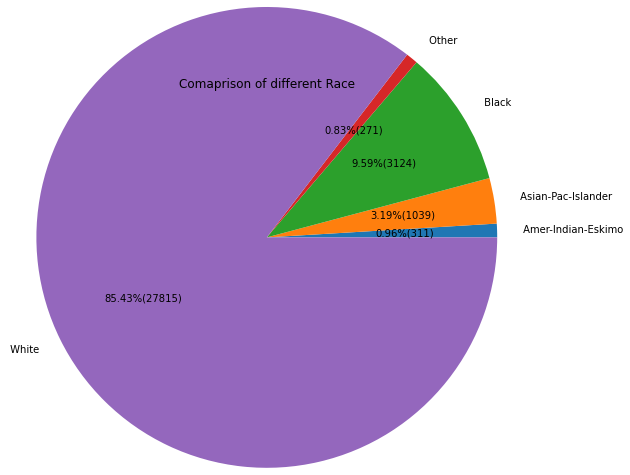

In [70]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=labels_5
value=[311,1039,3124,271,27815]
ax.pie(value,labels=langs,radius=2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of different Race')
plt.show()

Observations:

1.We can see that 85.43% are white people and 9.59 % are black.

Column 10: Sex

In [71]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [72]:
df['Sex'].replace(['Male','Female'],[1,0],inplace=True)

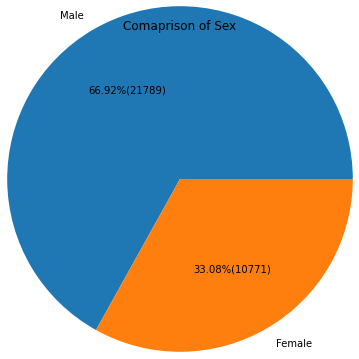

In [73]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Male','Female']
value=[21789,10771]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Comaprison of Sex')
plt.show()

In [74]:
df['Sex']=le.fit_transform(df['Sex'])

Observations:
    
    1.Majority are male with 66.92%.

Column 11: Capital_gain

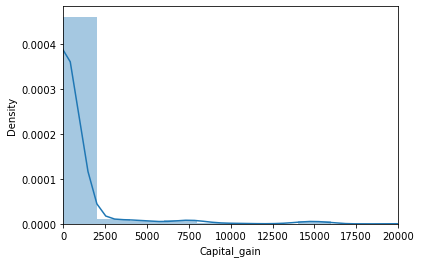

In [75]:
plt.plot()
sns.distplot(df['Capital_gain'])
plt.xlim(0,20000)
plt.show()

<AxesSubplot:>

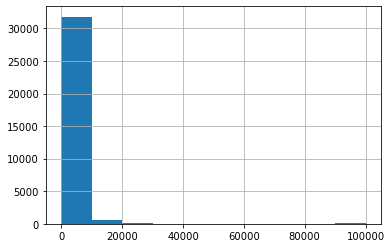

In [76]:
df['Capital_gain'].hist(grid=True)

Observations:

1.Most of the population has an income less than or equal to 10k.

<AxesSubplot:xlabel='Capital_gain'>

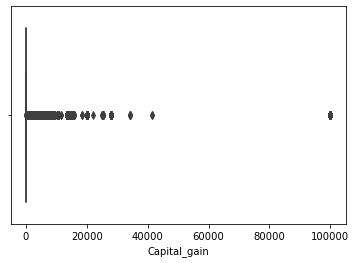

In [77]:
sns.boxplot(df['Capital_gain'])

Observations:

1.Outliers present.

Column 12: Capital_loss

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

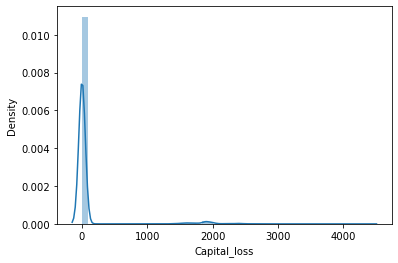

In [78]:
sns.distplot(df['Capital_loss'])

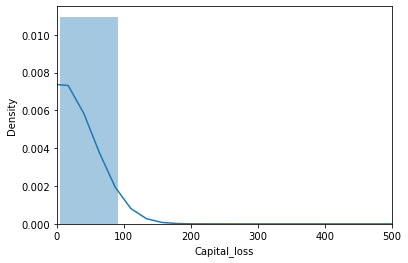

In [79]:
plt.plot()
sns.distplot(df['Capital_loss'])
plt.xlim(0,500)
plt.show()

<AxesSubplot:>

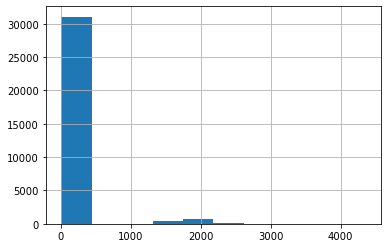

In [80]:
df['Capital_loss'].hist(grid=True)

Observations:

1.The capital loss is less than 500 in majority of the cases.

<AxesSubplot:xlabel='Capital_loss'>

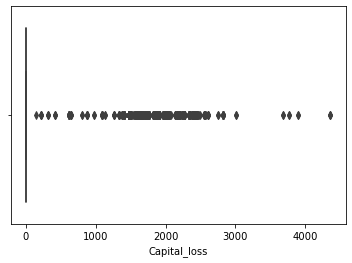

In [81]:
sns.boxplot(df['Capital_loss'])

Observations:

1.Outliers present.

Column 13: Hours_per_week

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

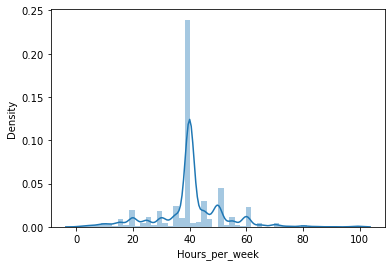

In [82]:
sns.distplot(df['Hours_per_week'])

<AxesSubplot:>

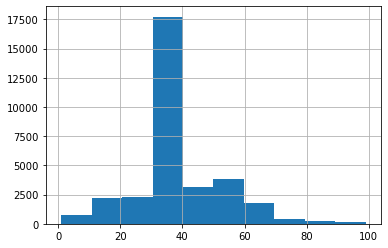

In [83]:
df['Hours_per_week'].hist(grid=True)

Observations:

1.Majority of the hours per week is around 40.

Column 14: Native_country

In [84]:
le.fit(df['Native_country'])
label_Native_country=dict(zip(range(len(le.classes_)),le.classes_))

In [85]:
df['Native_country']=le.fit_transform(df['Native_country'])

In [86]:
df['Native_country'].nunique()

42

In [87]:
df['Native_country'].replace(0,39,inplace=True)

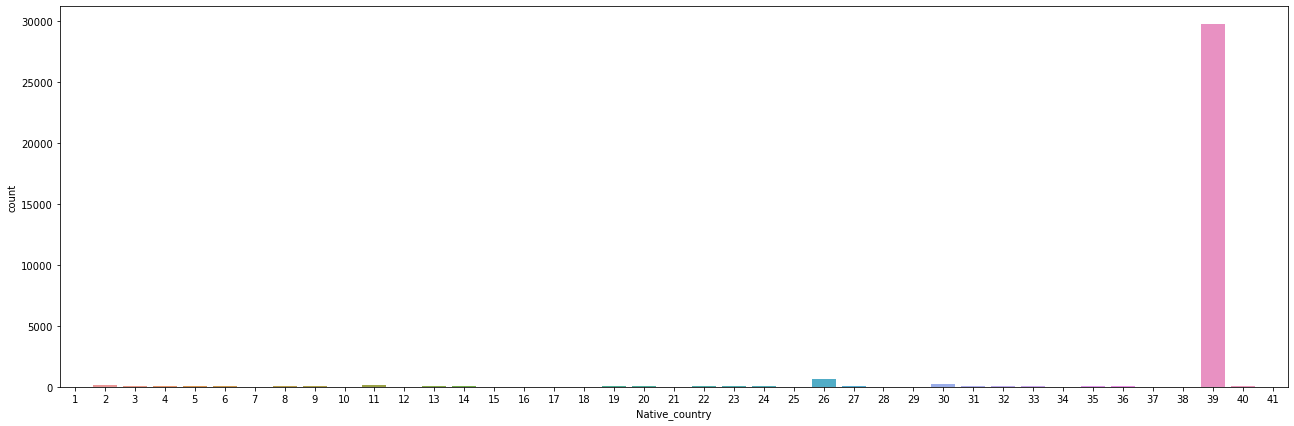

In [88]:
plt.figure(figsize=(22,7))
sns.countplot(df['Native_country'])
plt.show()

In [89]:
label_Native_country[39]

' United-States'

In [90]:
label_Native_country[26]

' Mexico'

In [91]:
label_Native_country[30]

' Philippines'

Observations:

1.We can see that United states,Mexico,Philippines are in majority.

Column 15: Income

In [92]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [93]:
df['Income']=le.fit_transform(df['Income'])

In [94]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

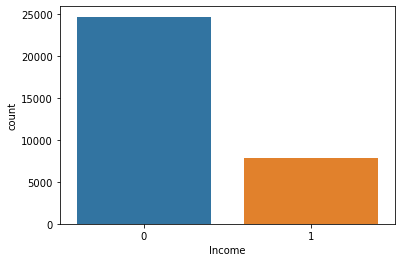

In [95]:
sns.countplot(df['Income'])

Multivariate Analysis

In [96]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,4,4,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,4,4,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,4,4,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,4,4,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,4,4,40,39,0


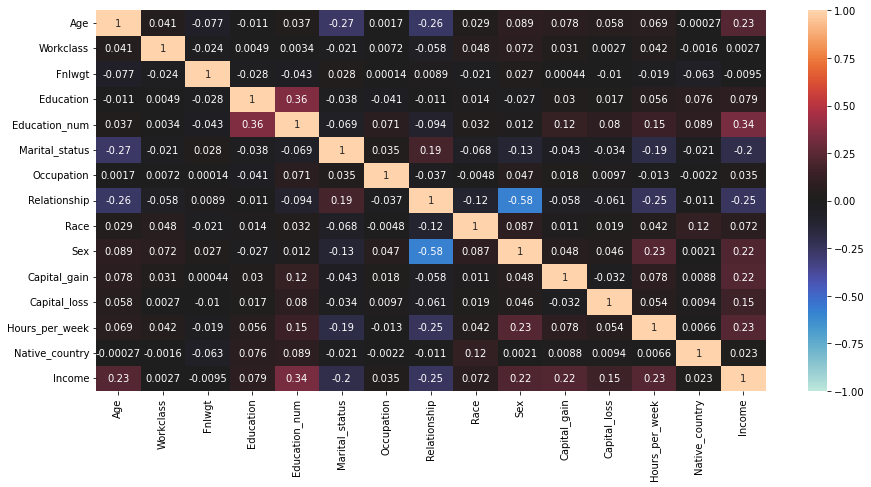

In [97]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:

Lets list out those independent variabels which are highly correlated with response variable.

    1.Age
    2.Education_num
    3.Marital_status
    4.Relationship
    5.Sex
    6.Capital_gain
    7.Capital_loss
    8.Hours_per_week
    
  There are variables which are significantly correlated with each other.
  
1.Relationship vs age
2.Marital_status vs age
3.Relationship vs sex
4.Relationship vs Hours_per_week
5.sex vs Hours_per_week

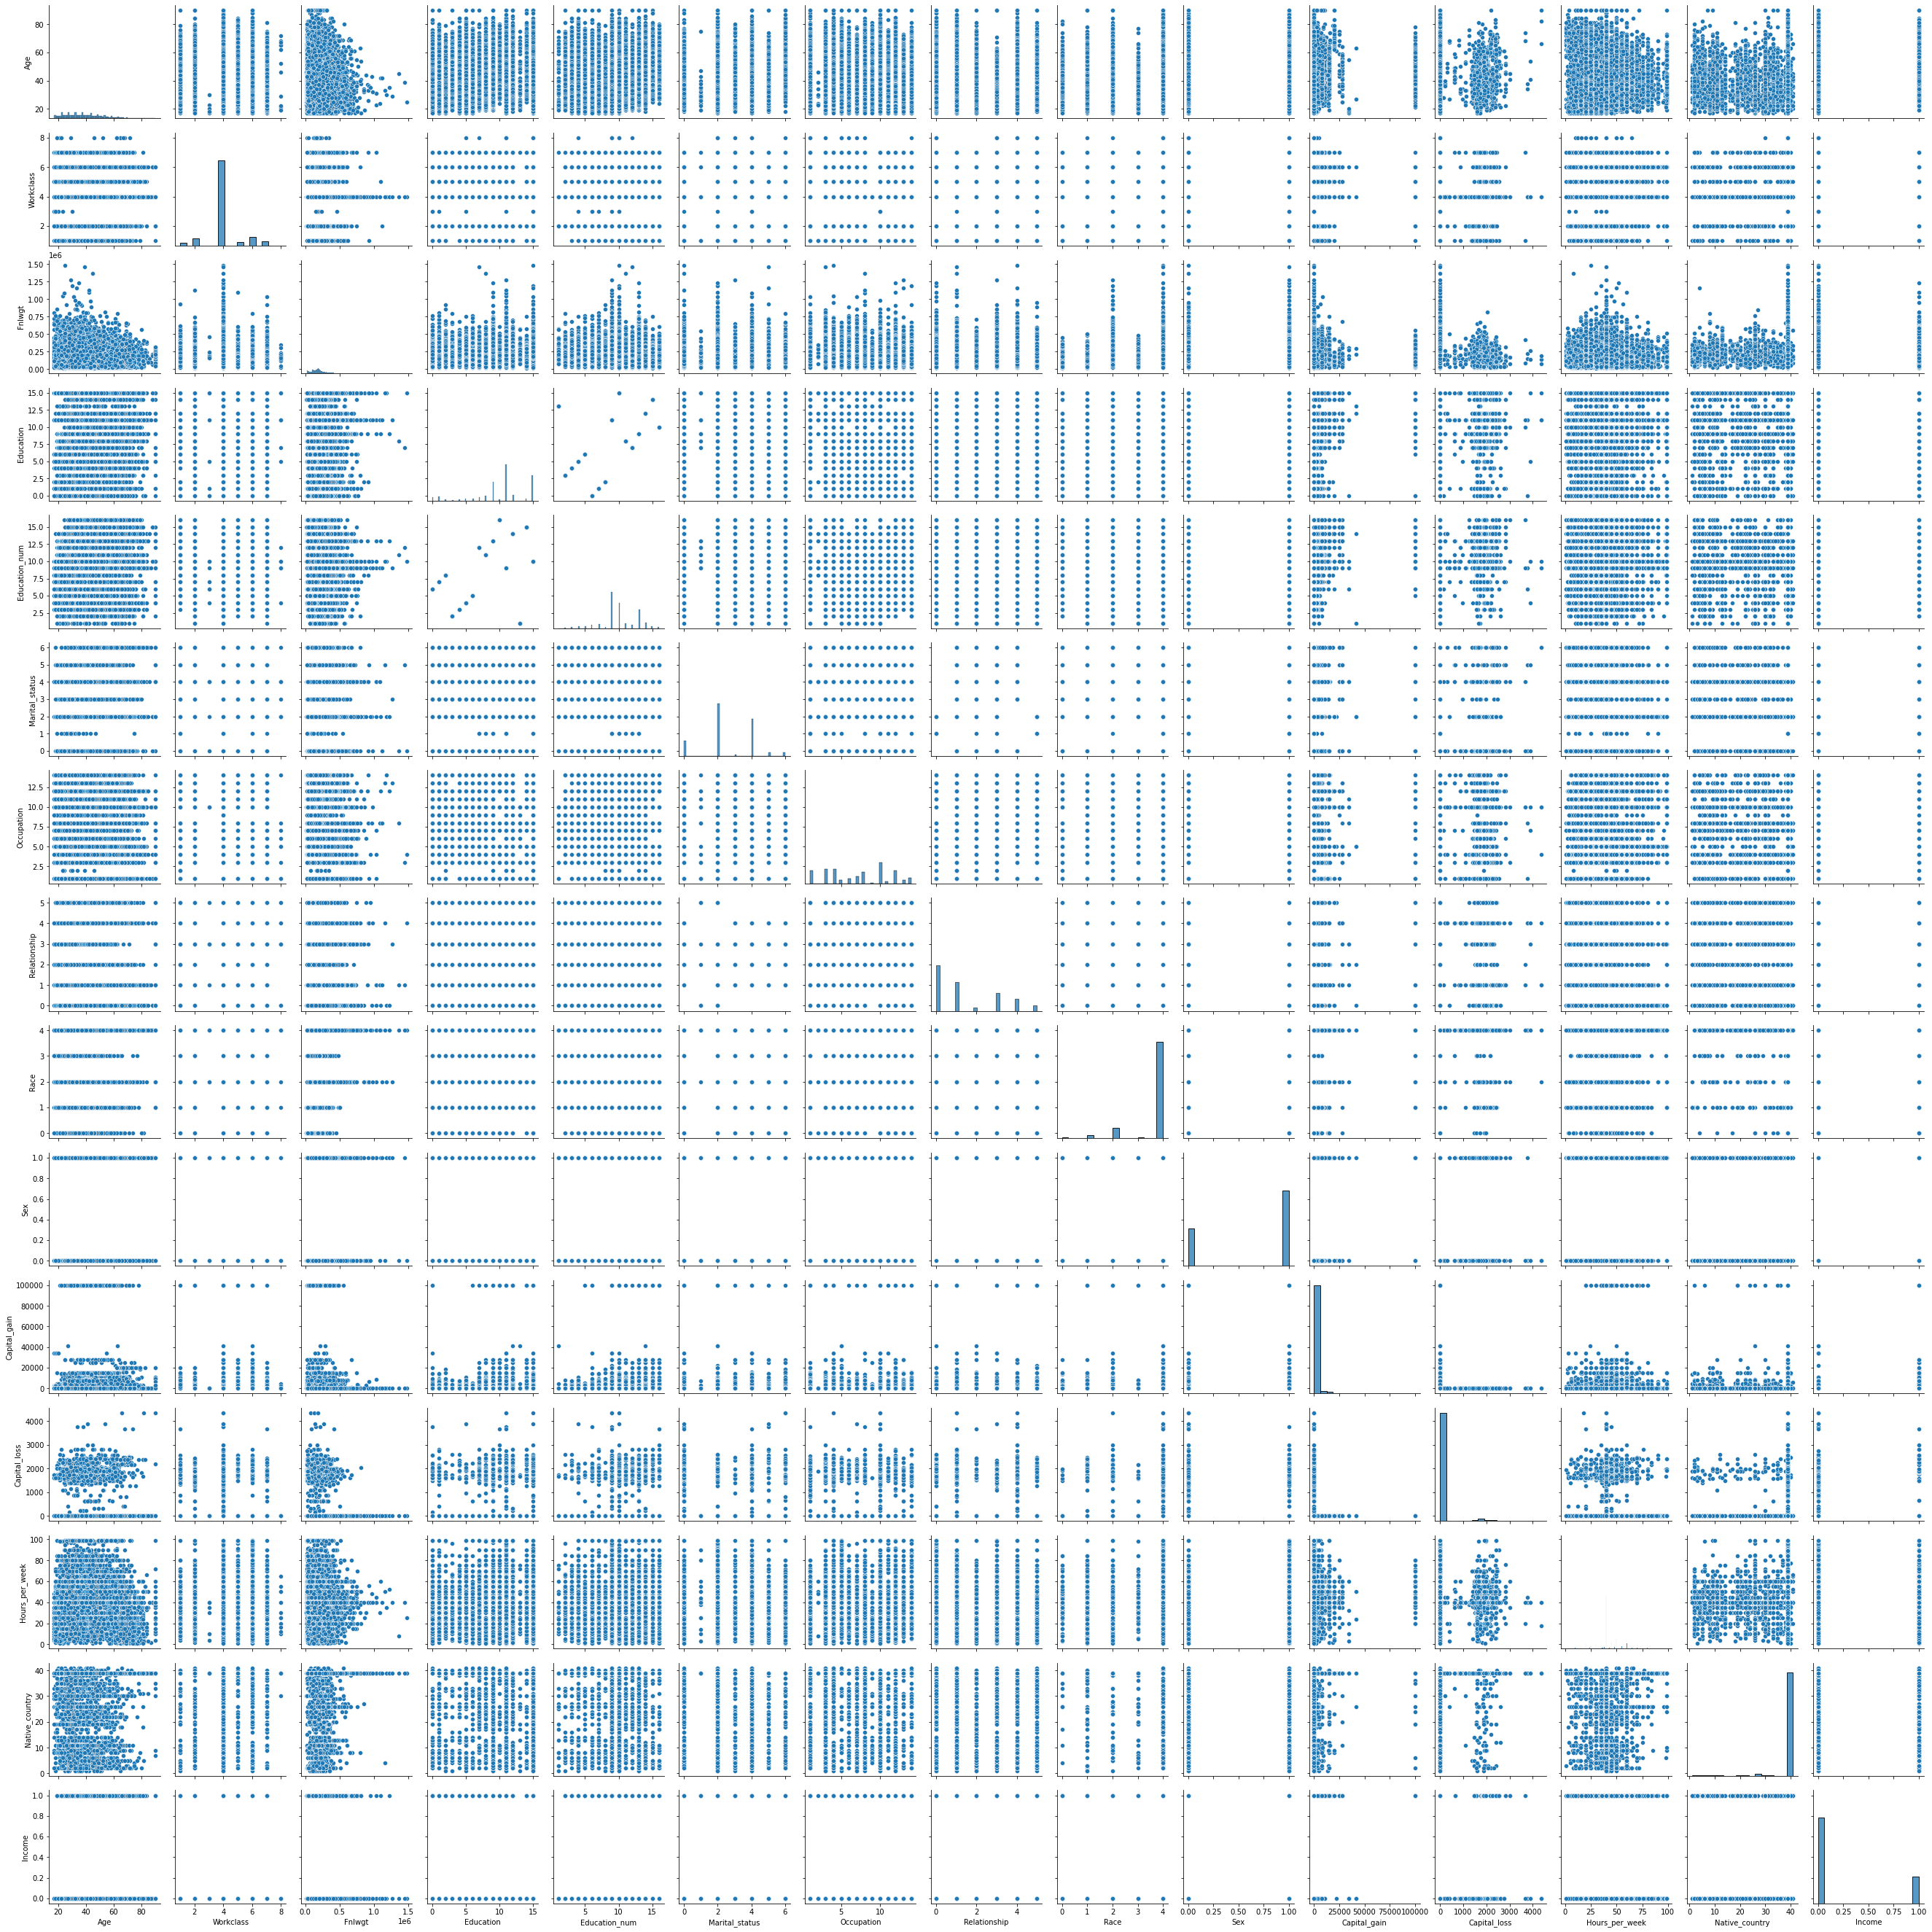

In [98]:
sns.pairplot(df)

Multivariate analysis by grouping function

In [99]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [100]:
i=df.groupby('Income')

In [101]:
i_yes=i.get_group(1)

In [102]:
i_no=i.get_group(0)

In [103]:
i_yes.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,7841.000000,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.0
mean,44.249841,4.099732,1.880050e+05,10.843260,11.611657,2.078816,7.382987,0.730519,3.774136,0.849637,4009.286953,198.607193,45.473026,37.665094,1.0
std,10.519028,1.258847,1.025418e+05,2.832536,2.385129,0.857536,3.955410,1.578539,0.734794,0.357450,14569.514325,594.306717,11.012971,5.770643,0.0
min,19.000000,1.000000,1.487800e+04,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000,1.0
25%,36.000000,4.000000,1.191010e+05,9.000000,10.000000,2.000000,4.000000,0.000000,4.000000,1.000000,4.000000,4.000000,40.000000,39.000000,1.0
50%,44.000000,4.000000,1.761010e+05,11.000000,12.000000,2.000000,8.000000,0.000000,4.000000,1.000000,4.000000,4.000000,40.000000,39.000000,1.0
75%,51.000000,4.000000,2.309590e+05,12.000000,13.000000,2.000000,10.000000,0.000000,4.000000,1.000000,4.000000,4.000000,50.000000,39.000000,1.0
max,90.000000,7.000000,1.226583e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3683.000000,99.000000,41.000000,1.0


In [104]:
i_no.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,24719.000000,24719.000000,2.471900e+04,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.000000,24719.0
mean,36.783648,4.092641,1.903454e+05,10.125369,9.594927,2.780857,7.061532,1.673450,3.631498,0.611958,152.503216,57.024354,38.840163,37.338444,0.0
std,14.020365,1.054427,1.064820e+05,4.130637,2.436100,1.623717,3.975018,1.548003,0.879142,0.487314,962.481113,310.098473,12.319242,6.141943,0.0
min,17.000000,1.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,1.000000,0.0
25%,25.000000,4.000000,1.176060e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,4.000000,4.000000,35.000000,39.000000,0.0
50%,34.000000,4.000000,1.794680e+05,11.000000,9.000000,3.000000,7.000000,1.000000,4.000000,1.000000,4.000000,4.000000,40.000000,39.000000,0.0
75%,46.000000,4.000000,2.390280e+05,12.000000,10.000000,4.000000,10.000000,3.000000,4.000000,1.000000,4.000000,4.000000,40.000000,39.000000,0.0
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41310.000000,4356.000000,99.000000,41.000000,0.0


Observations:

The following columns causes a significant affect over the category whether a person will cross 50k or not.
1.Age
2.Education_num
3.Occupation
4.Relationship
5.capital gain
6.capital loss
7.Hours per week

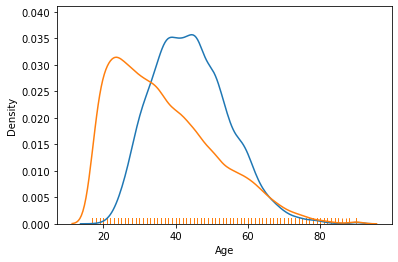

In [105]:
plt.plot()
sns.distplot(i_yes['Age'],hist=False,rug=True)
sns.distplot(i_no['Age'],hist=False,rug=True)
plt.show()

Observations:

1.Age with more than 40 years, are high who earn >50k a year.

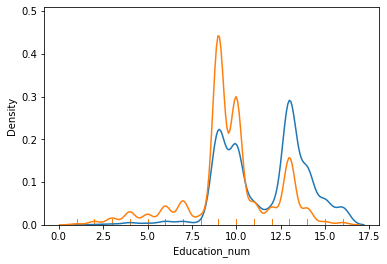

In [106]:
plt.plot()
sns.distplot(i_yes['Education_num'],hist=False,rug=True)
sns.distplot(i_no['Education_num'],hist=False,rug=True)
plt.show()

Observations:

1.Those people who cross more than 50k per annum will have most probably 13 as their Education_num.

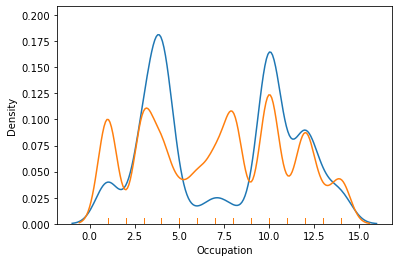

In [107]:
plt.plot()
sns.distplot(i_yes['Occupation'],hist=False,rug=True)
sns.distplot(i_no['Occupation'],hist=False,rug=True)
plt.show()

Observations:

1.Exec-managerial,Prof-specialty are the occupations which are highly practiced by those category of the people who are going to cross 50k per annum.

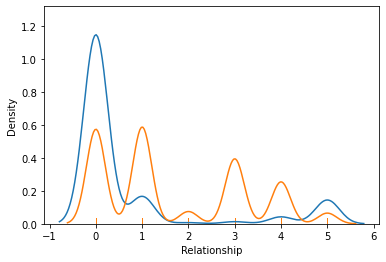

In [108]:
plt.plot()
sns.distplot(i_yes['Relationship'],hist=False,rug=True)
sns.distplot(i_no['Relationship'],hist=False,rug=True)
plt.show()

In [109]:
label_Relationship[0]

' Husband'

Observations:

1.Those people who belongs to the category of crossing 50k perannum will have the relationship as Husband.

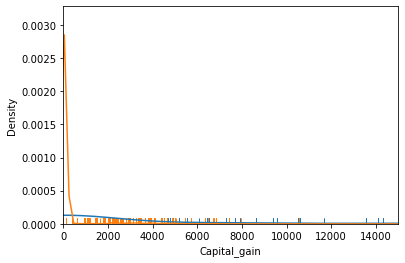

In [110]:
plt.plot()
sns.distplot(i_yes['Capital_gain'],hist=False,rug=True)
sns.distplot(i_no['Capital_gain'],hist=False,rug=True)
plt.xlim(0,15000)
plt.show()

Observations:

1.The density is uniform for that category which belongs to crossing 50k per annum upto 4000.

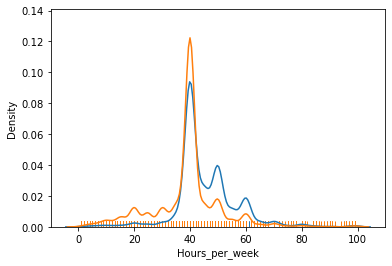

In [111]:
plt.plot()
sns.distplot(i_yes['Hours_per_week'],hist=False,rug=True)
sns.distplot(i_no['Hours_per_week'],hist=False,rug=True)
plt.show()

Observations:

1.Those people who crosses 50k per year will have the an average working per week around 45 to 60.

Bi variate analysis

In [112]:
df.loc[(df['Marital_status']==0)&(df['Income']==1)].count()

Age               463
Workclass         463
Fnlwgt            463
Education         463
Education_num     463
Marital_status    463
Occupation        463
Relationship      463
Race              463
Sex               463
Capital_gain      463
Capital_loss      463
Hours_per_week    463
Native_country    463
Income            463
dtype: int64

In [113]:
df['Marital_status'].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

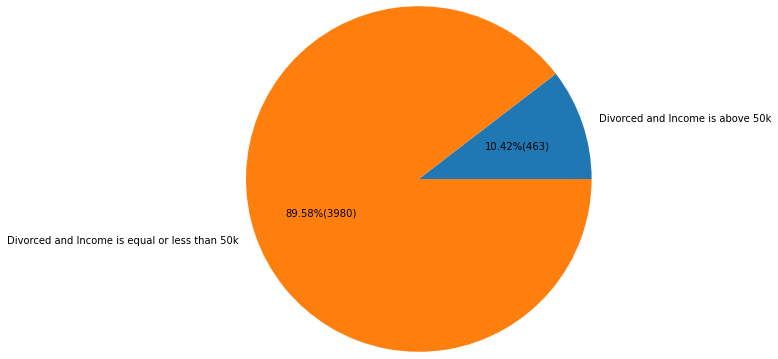

In [114]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Divorced and Income is above 50k','Divorced and Income is equal or less than 50k']
value=[463,3980]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:
.
1.We can see that only 10.42% of people of divorced category managed to cross 50k per annum.

In [115]:
df.loc[(df['Marital_status']==1)&(df['Income']==1)].count()

Age               10
Workclass         10
Fnlwgt            10
Education         10
Education_num     10
Marital_status    10
Occupation        10
Relationship      10
Race              10
Sex               10
Capital_gain      10
Capital_loss      10
Hours_per_week    10
Native_country    10
Income            10
dtype: int64

In [116]:
label_Marital_status[1]

' Married-AF-spouse'

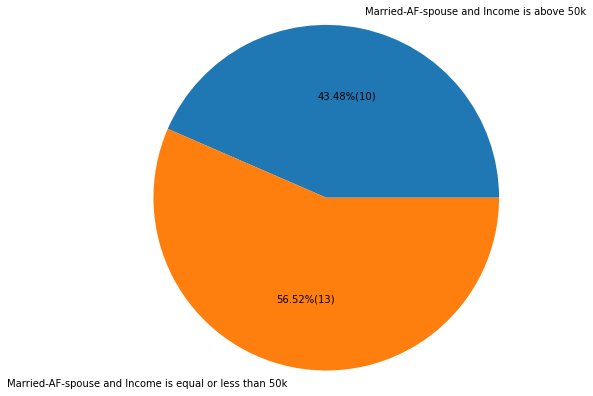

In [117]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Married-AF-spouse and Income is above 50k','Married-AF-spouse and Income is equal or less than 50k']
value=[10,13]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.We can see that 43.48% of people who belongs to Married-AF-spouse has managed to cross 50k per annum.

In [118]:
df.loc[(df['Marital_status']==2)&(df['Income']==1)].count()

Age               6692
Workclass         6692
Fnlwgt            6692
Education         6692
Education_num     6692
Marital_status    6692
Occupation        6692
Relationship      6692
Race              6692
Sex               6692
Capital_gain      6692
Capital_loss      6692
Hours_per_week    6692
Native_country    6692
Income            6692
dtype: int64

In [119]:
label_Marital_status[2]

' Married-civ-spouse'

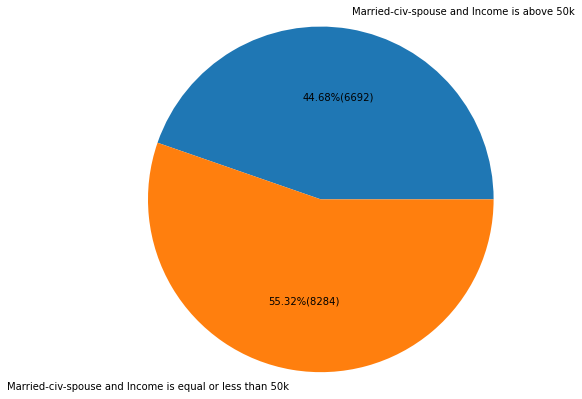

In [120]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Married-civ-spouse and Income is above 50k','Married-civ-spouse and Income is equal or less than 50k']
value=[6692,8284]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.We can see that more than 44.68% are married civ spouse and income is above 50k.

In [121]:
df.loc[(df['Marital_status']==3)&(df['Income']==1)].count()

Age               34
Workclass         34
Fnlwgt            34
Education         34
Education_num     34
Marital_status    34
Occupation        34
Relationship      34
Race              34
Sex               34
Capital_gain      34
Capital_loss      34
Hours_per_week    34
Native_country    34
Income            34
dtype: int64

In [122]:
label_Marital_status[3]

' Married-spouse-absent'

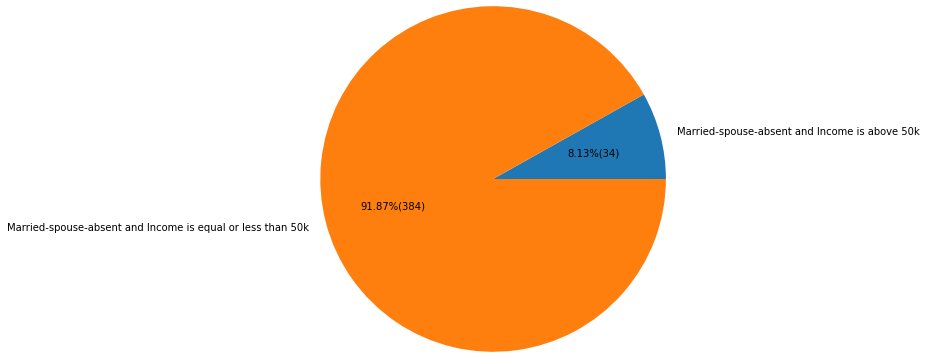

In [123]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Married-spouse-absent and Income is above 50k','Married-spouse-absent and Income is equal or less than 50k']
value=[34,384]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.We can see that 8.13% of the married spouse absent has managed to earn income above 50k.

In [124]:
df.loc[(df['Marital_status']==4)&(df['Income']==1)].count()

Age               491
Workclass         491
Fnlwgt            491
Education         491
Education_num     491
Marital_status    491
Occupation        491
Relationship      491
Race              491
Sex               491
Capital_gain      491
Capital_loss      491
Hours_per_week    491
Native_country    491
Income            491
dtype: int64

In [125]:
label_Marital_status[4]

' Never-married'

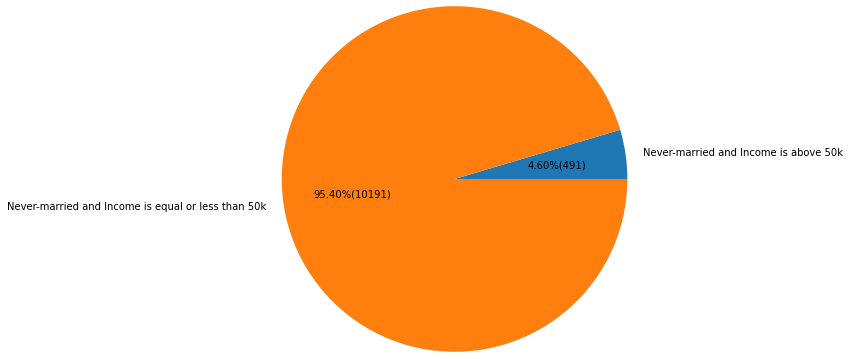

In [126]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Never-married and Income is above 50k','Never-married and Income is equal or less than 50k']
value=[491,10191]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.Only 4.6% never married population managed to cross 50k.

In [127]:
label_Marital_status[5]

' Separated'

In [128]:
df.loc[(df['Marital_status']==5)&(df['Income']==1)].count()

Age               66
Workclass         66
Fnlwgt            66
Education         66
Education_num     66
Marital_status    66
Occupation        66
Relationship      66
Race              66
Sex               66
Capital_gain      66
Capital_loss      66
Hours_per_week    66
Native_country    66
Income            66
dtype: int64

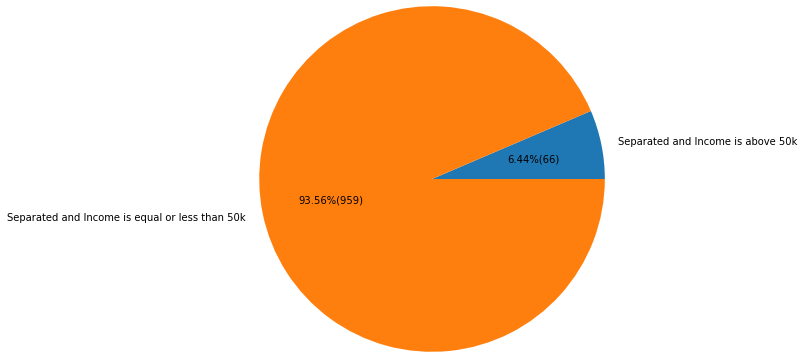

In [129]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Separated and Income is above 50k','Separated and Income is equal or less than 50k']
value=[66,959]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.We can see that 6.4% of separated has managed to gain income more than 50k.

In [130]:
label_Marital_status[6]

' Widowed'

In [131]:
df.loc[(df['Marital_status']==6)&(df['Income']==1)].count()

Age               85
Workclass         85
Fnlwgt            85
Education         85
Education_num     85
Marital_status    85
Occupation        85
Relationship      85
Race              85
Sex               85
Capital_gain      85
Capital_loss      85
Hours_per_week    85
Native_country    85
Income            85
dtype: int64

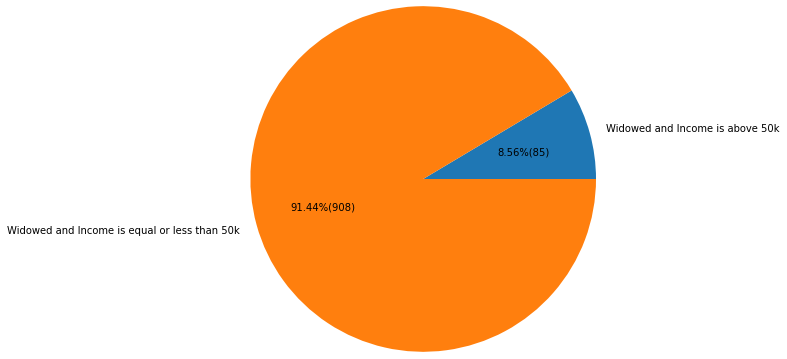

In [132]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Widowed and Income is above 50k','Widowed and Income is equal or less than 50k']
value=[85,908]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

In [133]:
df['Sex'].value_counts()

1    21789
0    10771
Name: Sex, dtype: int64

In [134]:
df.loc[(df['Sex']==0)&(df['Income']==1)].count()

Age               1179
Workclass         1179
Fnlwgt            1179
Education         1179
Education_num     1179
Marital_status    1179
Occupation        1179
Relationship      1179
Race              1179
Sex               1179
Capital_gain      1179
Capital_loss      1179
Hours_per_week    1179
Native_country    1179
Income            1179
dtype: int64

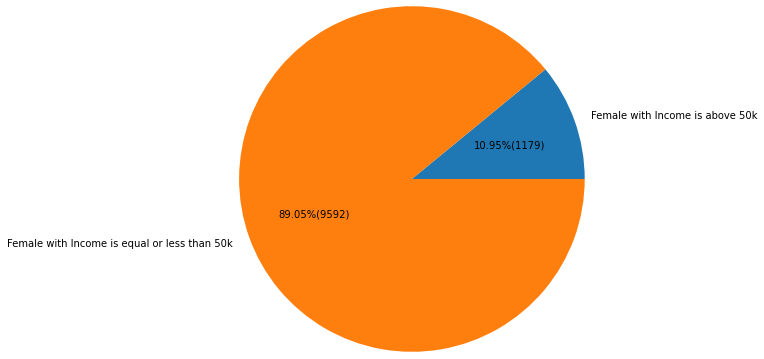

In [135]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Female with Income is above 50k','Female with Income is equal or less than 50k']
value=[1179,9592]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.10.95% of womens were able to earn the income above 50k.

In [136]:
df.loc[(df['Sex']==1)&(df['Income']==1)].count()

Age               6662
Workclass         6662
Fnlwgt            6662
Education         6662
Education_num     6662
Marital_status    6662
Occupation        6662
Relationship      6662
Race              6662
Sex               6662
Capital_gain      6662
Capital_loss      6662
Hours_per_week    6662
Native_country    6662
Income            6662
dtype: int64

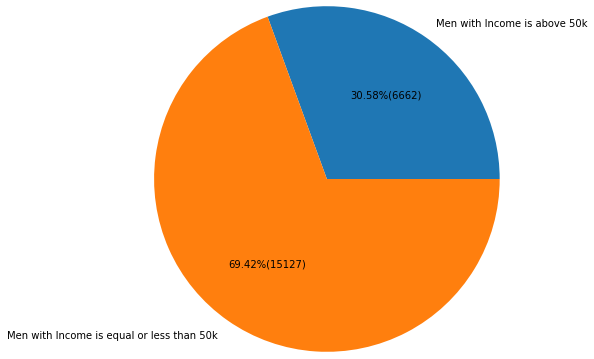

In [137]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Men with Income is above 50k','Men with Income is equal or less than 50k']
value=[6662,15127]
ax.pie(value,labels=langs,radius=1.5,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.show()

Observations:

1.We can see that among mens 30.58% are able to earn the income above 50k.

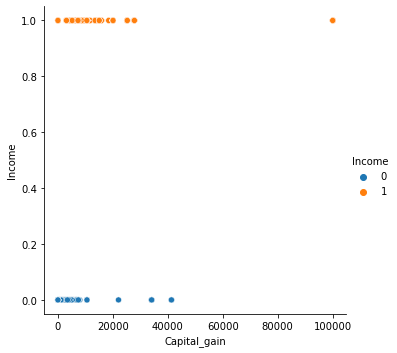

In [138]:
sns.relplot(x='Capital_gain',y='Income',hue='Income',data=df)

Observations:

1.We can see that those people with capital gain more than 13k are more favorable to achieve more than 50k annualy.

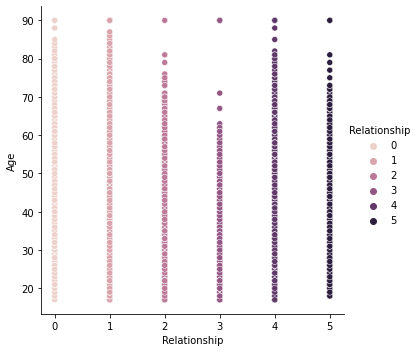

In [139]:
sns.relplot(x='Relationship',y='Age',hue='Relationship',data=df)

In [140]:
label_Relationship[2]

' Other-relative'

In [141]:
label_Relationship[3]

' Own-child'

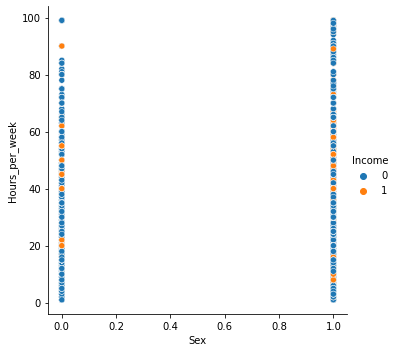

In [142]:
sns.relplot(x='Sex',y='Hours_per_week',hue='Income',data=df)

Observations:

1.We can see that the maximum number of hours per week for womens are around 80, and for mens its almost 100.

Data Cleaning

In [143]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observations:

1.Data cleaning not required since we have no null values.

Removal of outliers

Removal of outliers Zscore method

In [144]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.1471130221130221


Observations:

1.The data loss is more than 7% in this case.

In [145]:
q1=df.quantile(0)
q3=df.quantile(0.95)
IQR=q3-q1
df1=df[~((df <(q1-1.5*IQR))|(df1 >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by IQR is : 0.014864864864864866


In [146]:
df1.shape

(32076, 15)

In [147]:
df.shape

(32560, 15)

Observations:

1.Since data loss is less than 7% we can proceed further with our new dataset df1.

Splitting the variables

In [148]:
x=df1.drop('Income',axis=1)
y=df1['Income']

In [149]:
x.skew()

Age                0.570387
Workclass          0.081064
Fnlwgt             1.454532
Education         -0.931612
Education_num     -0.316419
Marital_status    -0.023775
Occupation         0.000807
Relationship       0.776166
Race              -2.421729
Sex               -0.712653
Capital_gain      12.803240
Capital_loss       4.585032
Hours_per_week     0.238027
Native_country    -4.215894
dtype: float64

Observations:

1.We have to treat the skewness of Fnlwgt and Capital gain.

In [150]:
from scipy import stats
from scipy.stats import boxcox

In [151]:
x['Fnlwgt']=np.sqrt(x['Fnlwgt'])

In [152]:
x['Capital_gain']=np.cbrt(x['Capital_gain'])

In [153]:
x['Capital_gain']=np.cbrt(x['Capital_gain'])

In [154]:
#accuracy with x,y
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5638
           1       0.65      0.33      0.44      1740

    accuracy                           0.80      7378
   macro avg       0.74      0.64      0.66      7378
weighted avg       0.78      0.80      0.77      7378

confusion matrix is
[[5333  305]
 [1171  569]]




In [163]:
#Accuracy score using x_over,y_over models,
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5638
           1       0.65      0.33      0.44      1740

    accuracy                           0.80      7378
   macro avg       0.74      0.64      0.66      7378
weighted avg       0.78      0.80      0.77      7378

confusion matrix is
[[5333  305]
 [1171  569]]




In [164]:
#Accuracy using x_xmote,y_smote models,
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5638
           1       0.65      0.33      0.44      1740

    accuracy                           0.80      7378
   macro avg       0.74      0.64      0.66      7378
weighted avg       0.78      0.80      0.77      7378

confusion matrix is
[[5333  305]
 [1171  569]]




Observations:

1.If we see accuracy wise we will say that x,y is best models.

Checking accuracy by appling standard scaling.

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scale=StandardScaler()

In [168]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5638
           1       0.65      0.33      0.44      1740

    accuracy                           0.80      7378
   macro avg       0.74      0.64      0.66      7378
weighted avg       0.78      0.80      0.77      7378

confusion matrix is
[[5333  305]
 [1171  569]]




Observations:

1.There is an insignificant rise in accuracy and f1 score.

Building the model

In [169]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [170]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.7999457847655191 on random state 1


In [171]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.8
classification report is
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5638
           1       0.65      0.33      0.44      1740

    accuracy                           0.80      7378
   macro avg       0.74      0.64      0.66      7378
weighted avg       0.78      0.80      0.77      7378

confusion matrix is
[[5333  305]
 [1171  569]]




In [172]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.811
classification report is
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5638
           1       0.62      0.53      0.57      1740

    accuracy                           0.81      7378
   macro avg       0.74      0.71      0.72      7378
weighted avg       0.80      0.81      0.81      7378

confusion matrix is
[[5063  575]
 [ 818  922]]




In [173]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.777
classification report is
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      5638
           1       0.72      0.09      0.16      1740

    accuracy                           0.78      7378
   macro avg       0.75      0.54      0.51      7378
weighted avg       0.76      0.78      0.70      7378

confusion matrix is
[[5578   60]
 [1586  154]]




In [174]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.81
classification report is
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5638
           1       0.60      0.60      0.60      1740

    accuracy                           0.81      7378
   macro avg       0.74      0.74      0.74      7378
weighted avg       0.81      0.81      0.81      7378

confusion matrix is
[[4933  705]
 [ 694 1046]]




In [175]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.776
classification report is
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5638
           1       0.54      0.38      0.45      1740

    accuracy                           0.78      7378
   macro avg       0.68      0.64      0.65      7378
weighted avg       0.76      0.78      0.76      7378

confusion matrix is
[[5059  579]
 [1073  667]]




In [176]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.858
classification report is
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5638
           1       0.77      0.57      0.65      1740

    accuracy                           0.86      7378
   macro avg       0.82      0.76      0.78      7378
weighted avg       0.85      0.86      0.85      7378

confusion matrix is
[[5342  296]
 [ 753  987]]




In [177]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.855
classification report is
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5638
           1       0.73      0.61      0.66      1740

    accuracy                           0.85      7378
   macro avg       0.81      0.77      0.79      7378
weighted avg       0.85      0.85      0.85      7378

confusion matrix is
[[5244  394]
 [ 679 1061]]




Cross validation score

In [179]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.799


GaussianNB() score is:
0.808


SVC() score is:
0.783


DecisionTreeClassifier() score is:
0.807


KNeighborsClassifier() score is:
0.781


AdaBoostClassifier() score is:
0.858


RandomForestClassifier() score is:
0.855




Observations:

The difference between accuracy score and cross val score is like this

    1.LogisticRegression=0.081
    2.GaussianNB        =0.002
    3.Support vector    =0.003
    4.Decision Tree     =0.003
    5.KNeighbors        =0.001
    6.AdaBoost          =0.002
    7.Random Forest     =0.005

We can see that the difference between accuracy score and cross val score is least in almost all the columns because we followed f1 score from the begining

I will choose Random forest classifier eventhough knn model has 0.001 difference because the f1 score of random forest is highest comapared to all the models

Hyper parameter tuning

In [183]:
grid_param={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gd_sr=GridSearchCV(estimator=lg,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'penalty': 'l1', 'solver': 'liblinear'}
0.8175583304015877


In [184]:
rf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_features='log2',bootstrap=False,oob_score=False,class_weight='balanced_subsample')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.85
classification report is
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5638
           1       0.72      0.60      0.65      1740

    accuracy                           0.85      7378
   macro avg       0.80      0.76      0.78      7378
weighted avg       0.84      0.85      0.85      7378

confusion matrix is
[[5231  407]
 [ 697 1043]]




Observations:

1.The maximum accuracy we got, with high f1 score is 0.817.

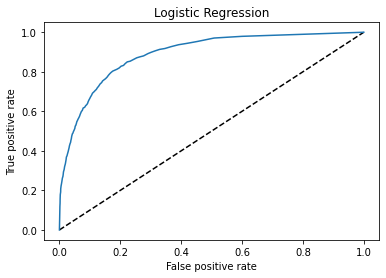

0.763618283976139

In [185]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:

1.The auc_roc score for this particular model is 0.763, suggesting that model is going to perform better.

Saving the model

In [186]:
import joblib
joblib.dump(rf1,'censusIncome.obj')

['censusIncome.obj']